In [1]:
import math

### Valid Palindrome 2

In [6]:
class Solution(object):
    def validPalindrome(self, s):
        for i in range(len(s)):
            if self.isPali(s[:i]+s[i+1:]):
                print(s[:i]+s[i+1:])
                return True
        return False
    
    def isPali(self, s):
        return (s==s[::-1])

In [34]:
class Solution(object):
    def validPalindrome(self, s):
        l=len(s)
        if self.isPali(s):
            return True
        
        for i in range(l):
            if s[i]!=s[-i-1]:
                if self.isPali(s[:i]+s[i+1:]) or self.isPali(s[:l-i-1]+s[l-i:]):
                    print(s[:i]+s[i+1:], s[:l-i-1]+s[l-i:])
                    return True
        return False
    
    def isPali(self, s):
        return (s==s[::-1])

In [37]:
Solution().validPalindrome(s)

False

In [7]:
def find_hidden_string(input_string):
    s=input_string
    l=len(s)
    def isPali(s):
        return (s==s[::-1])
    if isPali(s):
        return s
    
    for i in range(l):
        if s[i]!=s[-i-1]:
            if isPali(s[:i]+s[i+1:]):
                return s[:i]+s[i+1:]
            if isPali(s[:l-i-1]+s[l-i:]):
                return s[:l-i-1]+s[l-i:]
    return 'None'

In [69]:
def find_hidden_string(input_string):
    
    st=set()
    
    def isPali(s):
        return (s==s[::-1])
    def pali(s, low, high, st):
        while (low >= 0 and high < len(s) and s[low] == s[high]):
            if low!=high:
                st.add(s[low:high + 1])
            low-=1
            high+=1
            
    if isPali(input_string):
        return input_string
    for i in range(len(input_string)):
        pali(input_string, i, i, st)
        pali(input_string, i, i + 1, st)
    
    print(st)
    if len(st)>0:
        mx=max(len(i) for i in st)
        l=list(st)
        l=sorted(sorted(l), key=(lambda x: len(x)), reverse=True)
        return l[0]
        
    return 'None'

In [71]:
s='yyFtFy'
find_hidden_string(s)

{'yy', 'yFtFy', 'FtF'}


'yFtFy'

In [45]:
def longestPalindromeSubseq(s: str) -> int:
    r=s[::-1]
    dp=[[0 for i in range(len(s)+1)] for j in range(len(s)+1)]
    ans=[]
    a=''
    for i in range(1,len(s)+1):
        for j in range(1,len(s)+1):
            if s[i-1]==r[j-1]:
                a+=s[i-1]
                print(a,s[i-1],r[j-1])
                dp[i][j]+=1+dp[i-1][j-1]
            else:
                dp[i][j]+=max(dp[i-1][j],dp[i][j-1])
        ans.append(a)
    return ans



In [46]:
longestPalindromeSubseq('wabcdcbax')

w w w
wa a a
waa a a
waab b b
waabb b b
waabbc c c
waabbcc c c
waabbccd d d
waabbccdc c c
waabbccdcc c c
waabbccdccb b b
waabbccdccbb b b
waabbccdccbba a a
waabbccdccbbaa a a
waabbccdccbbaax x x


['w',
 'waa',
 'waabb',
 'waabbcc',
 'waabbccd',
 'waabbccdcc',
 'waabbccdccbb',
 'waabbccdccbbaa',
 'waabbccdccbbaax']

## LeetCode Contest

In [59]:
class Solution(object):
    def luckyNumbers (self, matrix):
        mi=[]
        for i in matrix:
            mi.append(min(i))
        r=len(matrix)
        c=len(matrix[0])
        
        ans=[]
        for j in range(c):
            col=[matrix[i][j] for i in range(r)]
            for m in mi:
                print(m,col)
                if m==max(col):
                    ans.append(m)
        
                
        return ans

In [60]:
matrix = [[3,7,8],[9,11,13],[15,16,17]]

Solution().luckyNumbers(matrix)

3 [3, 9, 15]
9 [3, 9, 15]
15 [3, 9, 15]
3 [7, 11, 16]
9 [7, 11, 16]
15 [7, 11, 16]
3 [8, 13, 17]
9 [8, 13, 17]
15 [8, 13, 17]


[15]

## Custom Stack Increment

In [23]:
from collections import deque
class CustomStack(object):

    def __init__(self, maxSize):
        self.l=deque()
        self.s=maxSize
        

    def push(self, x):
        if len(self.l)<self.s:
            self.l.append(x)
        return
        

    def pop(self):
        if len(self.l)>0:
            return self.l.pop()
        return
        

    def increment(self, k, val):
        if k<len(self.l):
            for i in range(k):
                self.l[i]+=val
        else:
            for i in range(len(self.l)):
                self.l[i]+=val
        return



In [76]:
obj = CustomStack(3)
obj.push(1)
obj.push(2)
obj.push(3)

obj.increment(2,100)
obj.pop()

## Balance a BST

In [347]:
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        
class Solution(object):

    def balanceBST(self, root):
        l=self.height(root.left)
        r=self.height(root.right)
        print(l,r)
        if l not in range(r-1,r+2):
            for i in range(abs(l-r)//2):
                if l>r:
                    root=self.rotateRight(root)
                    print(root.val)
                else:
                    root=self.rotateLeft(root)
                    print(root.val)
        return root
    
    def rotateRight(self, r):
        if r:
            t=TreeNode(r.val)
            t.right=r.right
            if not r.left.right:
                r.left.right=t
            else:
                if t.val<r.left.right.val:
                    t.right=TreeNode(r.left.right.val)
                    if r.left.right.left:
                        t.left=r.left.right.left
                    r.left.right=t
                else:
                    r.left.right.right=t
            return r.left
        
    def rotateLeft(self, r):
        if r:
            t=TreeNode(r.val)
            t.left=r.left
            if r.right:
                r.right.left=t
                return r.right
            else:
                return r
        
        
    def height(self, root):
        if root:
            return max(self.height(root.left), self.height(root.right))+1
        return 0

In [234]:
r=TreeNode(1)
r.right=TreeNode(2)
r.right.right=TreeNode(3)
r.right.right.right=TreeNode(4)


In [235]:
x=Solution().balanceBST(r)


0 3
2


## Max Performance

In [89]:
class Solution(object):
    def maxPerformance(self, n, speed, efficiency, k):
        l=0
        r=k-1
        mx=0
        while r<n:
            p=sum(speed[l:r])*min(efficiency[l:r])
            mx=max(mx,p)
            
            
        return mx%(10**9+7)

In [90]:
n = 6
speed = [2,10,3,1,5,8]
efficiency = [5,4,3,9,7,2] 
k = 4

Solution().maxPerformance(n,speed,efficiency,k)

KeyboardInterrupt: 

## Word Pattern

In [16]:
class Solution(object):
    def wordPattern(self, pattern, str):
        if str:
            w=str.split(' ')
            if len(w)!=len(pattern):
                return False
            a={}

            for i in range(len(w)):
                print(a)
                if pattern[i] in a:
                    if w[i]!=a[pattern[i]]:
                        return False
                else:
                    if w[i] in a.values():
                        return False
                    a[pattern[i]]=w[i]
            return True

In [21]:
pattern='abbc'
str='c d d c'
Solution().wordPattern(pattern, str)

{}
{'a': 'c'}
{'a': 'c', 'b': 'd'}
{'a': 'c', 'b': 'd'}


False

In [22]:
slist = str.split()
[pattern.find(x) for x in pattern] == [slist.index(x) for x in str_list]

[0, 1, 1, 3]
[0, 1, 1, 0]


## Absolute Permutation - HackerRank

In [27]:
def absolutePermutation(n, k):
    ans=[]
    s=set()
    for i in range(1,n+1):
        if i-k>0 and i-k<=n and i-k not in s:
            ans.append(i-k)
            s.add(i-k)
        elif i+k>0 and i+k<=n and i+k not in s:
            ans.append(i+k)
            s.add(i+k)
        else:
            return [-1]
    return ans


In [28]:
absolutePermutation(10,1)

[2, 1, 4, 3, 6, 5, 8, 7, 10, 9]

## Bomberman Game

In [234]:
from collections import defaultdict
def bomberMan(n, grid):
    bombs=defaultdict(list)
    grid=[split_str(r) for r in grid]
    getbombs(grid, bombs, 0)
    for i in range(1,n+1):
        grid, bombs = state(i, n, grid, bombs)
    ans= [''.join(g) for g in grid]
    return ans

def split_str(s):
    return [ch for ch in s]

def state(r, n, grid, bombs):
    if r<3:
        if r==1:
            pass
        if r==2:
            fillin(grid, r, bombs)
        return grid, bombs
    else:
#         if r%2!=0:
#             fillin(grid, r, bombs)
        if r-3 in bombs:
            explode(grid, bombs, r-3)
        else:
            fillin(grid, r, bombs)
        
    return grid, bombs

def fillin(grid, r, bombs):
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j]!='O':
                grid[i][j]='O'
                bombs[r].append((i,j))
    print(bombs)

def getbombs(grid, bombs, r):
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j]=='O':
                bombs[r].append((i,j))
        
def explode(grid, bombs, r):
    for b in bombs[r]:
        grid[b[0]][b[1]]='.'
        if b[0]<len(grid)-1:
            grid[b[0]+1][b[1]]='.'
        if b[0]>0:
            grid[b[0]-1][b[1]]='.'
        if b[1]<len(grid)-1:
            grid[b[0]][b[1]+1]='.'
        if b[1]>0:
            grid[b[0]][b[1]-1]='.'
    
    return grid
        
    

In [241]:
g=['.......',
'...O.O.',
'....O..',
'..O....',
'OO...OO',
'OO.O...']


n=2
bomberMan(n,g)

defaultdict(<class 'list'>, {0: [(1, 3), (1, 5), (2, 4), (3, 2), (4, 0), (4, 1), (4, 5), (4, 6), (5, 0), (5, 1), (5, 3)], 2: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 0), (1, 1), (1, 2), (1, 4), (1, 6), (2, 0), (2, 1), (2, 2), (2, 3), (2, 5), (2, 6), (3, 0), (3, 1), (3, 3), (3, 4), (3, 5), (3, 6), (4, 2), (4, 3), (4, 4), (5, 2), (5, 4), (5, 5), (5, 6)]})


['OOOOOOO', 'OOOOOOO', 'OOOOOOO', 'OOOOOOO', 'OOOOOOO', 'OOOOOOO']

## Similar String Groups

In [321]:
class Solution(object):
    def numSimilarGroups(self, A):
        g=[[] for j in range(len(A))]
        for i in range(len(A)):
            for j in range(i+1,len(A)):
                if self.similar(A[i],A[j]):
                    g[i].append(j)
                    g[j].append(i)
        c=1
        print(g)
        for x in g:
            if len(x)==0:
                c+=1
        return c
    
    def similar(self, a, b):
        cn=0
        for c in range(len(a)):
            if a[c]!=b[c]:
                cn+=1
            if cn>2:
                return False
        return True
                    

In [322]:
A=["jvhpg","jhvpg","hpvgj","hvpgj","vhgjp"]
Solution().numSimilarGroups(A)

[[1], [0], [3], [2], []]


2

## Complex Number Multiplication

In [46]:
class Solution:
    def complexNumberMultiply(self, a: str, b: str) -> str:
        
        ast=a.split('+')
        bst=b.split('+')
        return self.multiply(ast,bst)
    
    def multiply(self,a,b):
        
        r=''
        i=''
        (r1,i1)=self.getrealim(a)
        (r2,i2)=self.getrealim(b)

        r+=str(r1*r2 - i1*i2)
        i+=str(r1*i2+r2*i1)+'i'
        
        return r+'+'+i
        

    def getrealim(self,a):
        r1,i1=0,0
        if len(a)>1:
            r1=int(a[0])
            i1=int(a[1].split('i')[0])
        elif 'i' in a[0]:
            i1=int(a[0].split('i')[0])
        else:
            r1=int(a[0])
            
        return r1,i1
      

In [47]:
Solution().complexNumberMultiply('-1+-2i','1+3i')

'5+-5i'

## Longest Palindromic Subsequence

In [113]:
from collections import defaultdict
class Solution:
    def longestPalindromeSubseq(self, s: str) -> int:
        r=s[::-1]
        dp=[[0 for i in range(len(s)+1)] for j in range(len(s)+1)]
        
        for i in range(1,len(s)+1):
            for j in range(1,len(s)+1):
                if s[i-1]==r[j-1]:
                    dp[i][j]+=1+dp[i-1][j-1]
                else:
                    dp[i][j]+=max(dp[i-1][j],dp[i][j-1])

        return dp[-1][-1]
        

In [115]:
s='abcdefedcbdn'
Solution().longestPalindromeSubseq(s)

9

## Lowest Common Subsequence

In [112]:
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        dp=[[0 for i in range(len(text2)+1)] for j in range(len(text1)+1)]
        
        for i in range(1,len(text1)+1):
            for j in range(1,len(text2)+1):
                if text1[i-1]==text2[j-1]:
                    dp[i][j]+=1+dp[i-1][j-1]
                else:
                    dp[i][j]+=max(dp[i-1][j],dp[i][j-1])

        return dp[-1][-1]

## Sort by frequency

In [122]:
from collections import defaultdict
class Solution(object):
    def frequencySort(self, s):
        d=defaultdict(int)
        for c in s:
            d[c]+=1
        
        x={k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
        a=''
        for k in x:
            a+=k*x[k]
        return a

In [123]:
Solution().frequencySort('treeest')

'eeettrs'

In [397]:
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Codec:

    def serialize(self, root):
        if not root:
            return []
        q=[root]
        order=[]
        def bfs():
            while q:
                f=q.pop(0)
                if f:
                    order.append(str(f.val) )
                    q.append(f.left)
                    q.append(f.right)
                else: order.append('null')
        bfs()
        while order[-1]=='null' :
            order.pop(-1)
        out='['+",".join(order)+']'
        print(out)
        return out
            
    def getserealized(self, root, a):
        if root:
            a+=self.getserealized(root.left, a)+'.'+str(root.val)+'.'+self.getserealized(root.right, a)
            return a
        else:
            a+='N'
            return a
        

    def deserialize(self, data):
        """Decodes your encoded data to tree.
        
        :type data: str
        :rtype: TreeNode
        """

In [159]:
r=TreeNode(1)
r.left=TreeNode(2)
r.right=TreeNode(3)
r.left.left=TreeNode(4)
r.right.left=TreeNode(5)
Codec().serialize(r)

[1,2,3,4,null,5]


'[1,2,3,4,null,5]'

In [155]:
r.val

1

## Max Sliding Window

In [165]:
class Solution:
    def maxSlidingWindow(self, nums: [int], k: int) -> [int]:
        ans=[]
        for i in range(len(nums)-k+1):
            ans.append(max(nums[i:i+k]))
        
        return ans

In [202]:
class Solution:
    def maxSlidingWindow(self, nums: [int], k: int) -> [int]:
        return [max(nums[i - (k - 1): i + 1]) for i in range(k - 1, len(nums), 1)]

In [203]:
n=[1,3,-1,-3,5,3,6,7]
Solution().maxSlidingWindow(n,4)

[3, 5, 5, 6, 7]

## Search 2D Matrix

In [236]:
class Solution:
    def searchMatrix(self, matrix, target):
        
        if len(matrix)>0 and len(matrix[0])>0:
            rows=[]
            for i in range(len(matrix)):
                if target==matrix[i][0] or target==matrix[i][-1]:
                    return True
                elif target>matrix[i][0] and target<matrix[i][-1]:
                    rows.append(i)

            for r in rows:
                if target in matrix[r]:
                    return True
        return False

In [240]:
x=[
  [1,   4,  7, 11, 15],
  [2,   5,  8, 12, 19],
  [3,   6,  9, 16, 22],
  [10, 13, 14, 17, 24],
  [18, 21, 23, 26, 30]
]
Solution().searchMatrix(x,24)

True

## Lowest Common Ancestor Binary Tree

In [496]:
class Solution(object):
    def lowestCommonAncestor(self, root, p, q):
        return self.lca(root,p,q)
    
    def lca(self,r,p,q):
        if r:
            print('Root: ',r.val)
            if (r.val==p and (self.search(r.left,q) or self.search(r.right,q))) or (r.val==q and (self.search(r.left,p) or self.search(r.right,p))):
                return r
            elif (self.search(r.left,p) and self.search(r.right,q)) or (self.search(r.left,q) and self.search(r.right,p)):
                return r
            l=self.lca(r.left,p,q)
            r=self.lca(r.right,p,q)
            return (l if l else r)
        return
                
        
    def search(self, r, v):
        if r:
            print('searching ',r.val)
            if r.val==v:
                print('Found',v)
                return True
            else:
                return self.search(r.left,v) or self.search(r.right,v)
        return False
    
    

In [504]:
class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        return self.lca(root,p.val,q.val)
    
    def lca(self,r,p,q):
        if r:
            pathp=[]
            pathq=[]
            self.findPath(r,pathp,p)
            self.findPath(r,pathq,q)
            print('Path P')
            for x in pathp:
                print(x.val)
            print('Path Q')
            for x in pathq:
                print(x.val)
                
            if len(pathp)>0 and len(pathq)>0:
                if pathp[0].val!=pathq[0].val:
                    return
                else:
                    i=1
                    j=1
                    while i<len(pathp) and i<len(pathq):
                        if pathp[i].val!=pathq[i].val:
                            break
                        i+=1
                return pathp[i-1]
        return
                
    def findPath(self, root, path, k):
        if root==None:
            return False
        path.append(root)
        
        if root.val == k : 
            return True

        if ((root.left != None and self.findPath(root.left, path, k)) or
                (root.right!= None and self.findPath(root.right, path, k))): 
            return True

        path.pop()
        return False

In [526]:
class Solution(object):
    def lowestCommonAncestor(self, root, p, q):
        if root == None:
            return
        print(root.val)
        if root==p or root==q:
            return root
        
        llca = self.lowestCommonAncestor(root.left, p, q)  
        rlca = self.lowestCommonAncestor(root.right, p, q) 
        
        if llca and rlca:
            return root
        
        return (llca if llca else rlca)

In [547]:
class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        stack_p = self.dfs(root, p)
        stack_q = self.dfs(root, q)
        print('P: ')
        for s in stack_p:
            print(s.val)
        print()
        
        print('Q: ')
        for s in stack_q:
            print(s.val)
        min_len = min(len(stack_p), len(stack_q))
        for i in range(min_len):
            if stack_p[i] != stack_q[i]:
                return stack_p[i-1]
        return stack_p[min_len-1]
         
    def dfs(self, root, target):
        stack, cur , last =[], root, None
        while cur or stack:
            while cur:
                stack.append(cur)
                cur = cur.left
            node = stack[-1]
            if node.right and node.right != last:
                cur = node.right
            else:
                if node == target:
                    return stack
                stack.pop()
                last = node

In [597]:
r=TreeNode(3)
r.left=TreeNode(5)
r.right=TreeNode(1)
r.left.left=TreeNode(6)
r.left.right=TreeNode(2)
r.right.left=TreeNode(0)
r.right.right=TreeNode(8)
r.left.right.left=TreeNode(7)
r.left.right.right=TreeNode(4)

x=Solution().lowestCommonAncestor(r, r.left.right.right, r.right.left)

P: 
3
5
2
4

Q: 
3
1
0


## Most Frequent Subtree Sum

In [769]:
class Solution:
    def findFrequentTreeSum(self, root: TreeNode) -> [int]:
        if root:
            sums=defaultdict(int)
            
            def sumnode(r):
                if not r:
                    return 0
                if not r.left and not r.right:
                    sums[r.val]+=1
                    return r.val
                
                lsum=sumnode(r.left)
                rsum=sumnode(r.right)
                total=r.val+lsum+rsum
                sums[total]+=1
                return total
            
            sumnode(root)
            print(sums)
            most_freq = 0
            res = []
            for tree_sum , count in sums.items():
                if count > most_freq:
                    most_freq = count
                    res = []
                if count == most_freq:
                    res.append(tree_sum)
            return res
        return []
                
                
#     def sumnode(self, r, s):
#         if not r:
#             return
        
#         if r.left==None and r.right==None:
#             return s+r.val
        
#         if r.left:
#             s=self.sumnode(r.left,s)
#         if r.right:
#             s=self.sumnode(r.right,s)
#         return s+r.val

In [770]:
Solution().findFrequentTreeSum(r)

defaultdict(<class 'int'>, {1: 2, 2: 2, -1: 2, 0: 1})


[1, 2, -1]

In [764]:
r=TreeNode(0)
r.left=TreeNode(-2)
r.right=TreeNode(-2)
r.left.left=TreeNode(1)
r.left.right=TreeNode(2)
r.right.left=TreeNode(2)
r.right.right=TreeNode(-1)

Solution().findFrequentTreeSum(r)

defaultdict(<class 'int'>, {0: 1, -1: 2, 2: 2, 1: 2})


[-1, 2, 1]

In [ ]:
[49655,204166,38535,-1313,-5722,-186592,-19389,-22049,-2328,-166939,86119,38530,-66221,66175,231614,257921,84318,219795,-180421,93408,61441,83664,98999,-36488,65154,181827,66842,-1739,-83455,-66985,-38038,-12628,-46224,-79030]

In [594]:
import random
class RandomizedSet:

    def __init__(self):
        self.s=set()
        

    def insert(self, val: int) -> bool:
        if val not in self.s:
            self.s.add(val)
            return True
        return False
        

    def remove(self, val: int) -> bool:
        if val in self.s:
            self.s.remove(val)
            return True
        return False

    def getRandom(self) -> int:
        i=random.randint(0,len(self.s)-1)
        print(self.s,i)
        return list(self.s)[i]

In [595]:
r=RandomizedSet()
r.insert(30)
r.insert(20)
r.insert(10)
r.insert(30)
r.remove(30)
r.getRandom()

{10, 20} 0


10

In [593]:
s=set([1,2,3])
x=s.add(2)
print(x)

None


## Design Twitter

In [344]:
from collections import defaultdict
class Twitter:

    def __init__(self):
        self.users=defaultdict(list)
        self.tweets=defaultdict(dict)
        self.tcounter=0
        
        

    def postTweet(self, userId: int, tweetId: int) -> None:
        self.tcounter+=1
        self.tweets[userId][self.tcounter]=tweetId
#         print("TWEETS:",self.tweets)
        
        

    def getNewsFeed(self, userId: int) -> [int]:
        nf=[]
        nf=self.tweets[userId]
#         print("TWEETS:",self.tweets)
        
        for u in self.users[userId]:
            nf.update(self.tweets[u])

        nf={k:v for k,v in sorted(nf.items(), reverse=True)[:10]}
        x=[v for v in nf.values()]
        return x

    def follow(self, followerId: int, followeeId: int) -> None:
        if followerId!=followeeId:
            self.users[followerId].append(followeeId)
        

    def unfollow(self, followerId: int, followeeId: int) -> None:
        if followeeId in self.users[followerId] and followerId!=followeeId:
            self.users[followerId].remove(followeeId)
            self.tweets[followerId]={k: v for k, v in self.tweets[followerId].items() if k not in self.tweets[followeeId]}
        
        


In [345]:
["Twitter","postTweet","getNewsFeed","follow","postTweet","getNewsFeed","unfollow","getNewsFeed"]
[[],[1,5],[1],[1,2],[2,6],[1],[1,2],[1]]

obj = Twitter()
obj.postTweet(1,1)
obj.postTweet(1,2)
obj.postTweet(1,3)
obj.postTweet(1,4)
obj.postTweet(1,5)
obj.postTweet(1,6)
obj.postTweet(1,7)
obj.postTweet(1,8)
obj.postTweet(1,9)
obj.postTweet(1,13)
obj.postTweet(1,14)
p1 = obj.getNewsFeed(1)
obj.unfollow(1,1)
# obj.follow(1,3)
obj.postTweet(2,15)
obj.postTweet(2,16)
obj.postTweet(3,17)
obj.postTweet(3,18)
p2 = obj.getNewsFeed(1)
obj.unfollow(1,2)
p3 = obj.getNewsFeed(1)

In [346]:
print(p1,p2,p3)

[14, 13, 9, 8, 7, 6, 5, 4, 3, 2] [14, 13, 9, 8, 7, 6, 5, 4, 3, 2] [14, 13, 9, 8, 7, 6, 5, 4, 3, 2]


In [339]:
obj.unfollow(1,3)
obj.getNewsFeed(1)

{2, 3, 4, 5, 6, 7, 8, 9, 13, 14}

## Random Lines

In [55]:
import matplotlib.pyplot as plt
import random

def plotline(p1,p2):
    plt.plot(p1,p2,c='blue')
    return
    
def makelines(n, r):
    plt.figure(figsize=(r+1,r+1))
    lines=[]
    for i in range(n):
        hv=random.randint(0,10)
        if hv%2==0:
            x1=random.randint(0,r)
            x2=random.randint(0,r)
            y1,y2=hv,hv
        else:
            y1=random.randint(0,r)
            y2=random.randint(0,r)
            x1,x2=hv,hv
        p1=(x1,y1)
        p2=(x2,y2)
        plotline((x1,x2),(y1,y2))
        lines.append([p1,p2])
    return lines


def scan(lines, r):
    for i in range(r):
        for l in range(len(lines)):
            if lines[l][0][0]==i:
                print('Line no.',l+1)
                
        
    
    

Line  1 [(3, 0), (3, 0)]
Line  2 [(7, 0), (5, 0)]
Line  3 [(5, 5), (5, 7)]
Line  4 [(5, 2), (10, 2)]
Line  5 [(9, 0), (9, 1)]
Line  6 [(3, 5), (3, 8)]
Line  7 [(5, 0), (8, 0)]
Line  8 [(1, 8), (4, 8)]
Line  9 [(1, 10), (2, 10)]
Line  10 [(9, 2), (7, 2)]
Line  11 [(2, 0), (7, 0)]
Line  12 [(9, 0), (9, 7)]
Line  13 [(1, 7), (1, 7)]
Line  14 [(6, 8), (8, 8)]
Line  15 [(10, 6), (5, 6)]
Line  16 [(7, 2), (7, 7)]
Line  17 [(8, 0), (9, 0)]
Line  18 [(5, 4), (10, 4)]
Line  19 [(3, 9), (3, 2)]
Line  20 [(7, 10), (2, 10)]

Line no. 8
Line no. 9
Line no. 13
Line no. 11
Line no. 1
Line no. 6
Line no. 19
Line no. 3
Line no. 4
Line no. 7
Line no. 18
Line no. 14
Line no. 2
Line no. 16
Line no. 20
Line no. 17
Line no. 5
Line no. 10
Line no. 12


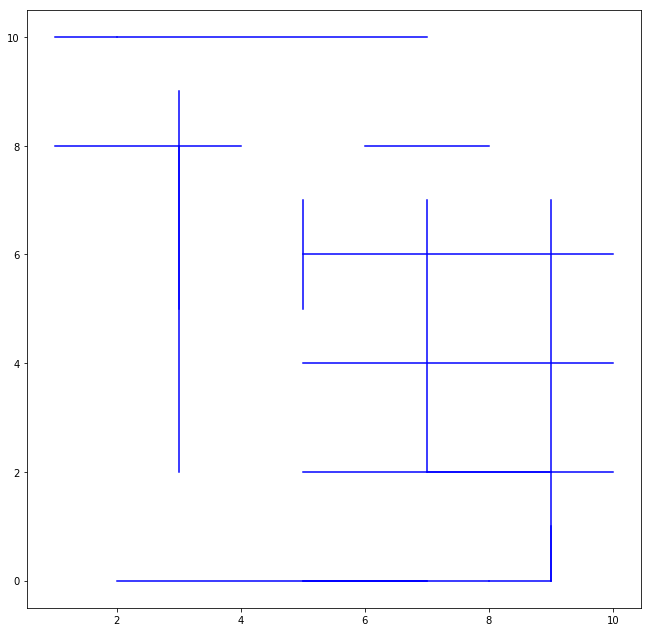

In [56]:
r=10
lines=makelines(20,r)
for i in range(len(lines)):
    print('Line ',i+1, lines[i])

print()
scan(lines,r)

## Find if number is Fibonacci

In [18]:
import matplotlib.pyplot as plt
def isFib(n):
    a=[0,1]
    for i in range(2,n):
        a.append(a[i-1]+a[i-2])
        if a[i]==n:
            return True
    plt.scatter(range(n),a)
    plt.figure(figsize=(10,10))
    return False

False

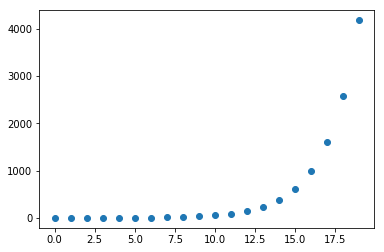

<Figure size 720x720 with 0 Axes>

In [22]:
isFib(20)